<a href="https://colab.research.google.com/github/Sahana200301/CODSOFT/blob/main/CODSOFT_TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data=pd.read_csv("sales.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.shape

(200, 4)

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Applying Machine Learning Models

# { Linear Regression, Random Forest Regressor }

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

lr_accuracy = r2_score(y_test, lr_predictions) * 100
rf_accuracy = r2_score(y_test, rf_predictions) * 100
print(f"Linear Regression Accuracy: {lr_accuracy:.2f}%")
print(f"Random Forest Regressor Accuracy: {rf_accuracy:.2f}%")

Linear Regression Accuracy: 90.59%
Random Forest Regressor Accuracy: 95.35%


# Model Evaluation

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate LR
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
# Evaluate RF
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Linear Regression Results:")
print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}\n")
print("Random Forest Results:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

Linear Regression Results:
Mean Squared Error: 2.91
R-squared: 0.91

Random Forest Results:
Mean Squared Error: 1.44
R-squared: 0.95


# Example Input for Predicting Future Sales

In [ ]:
example = [[150, 20, 30]]
lr_example_prediction = lr_model.predict(example)
rf_example_prediction = rf_model.predict(example)

print("\n=== Predicted Sales for Given Example Input ===")
print(f"Input Details: TV = {example[0][0]}, Radio = {example[0][1]}, Newspaper = {example[0][2]}")
print(f"Predicted Sales (Linear Regression): {lr_example_prediction[0]:.2f}")
print(f"Predicted Sales (Random Forest): {rf_example_prediction[0]:.2f}")


=== Predicted Sales for Given Example Input ===
Input Details: TV = 150, Radio = 20, Newspaper = 30
Predicted Sales (Linear Regression): 15.04
Predicted Sales (Random Forest): 13.98


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Visualization

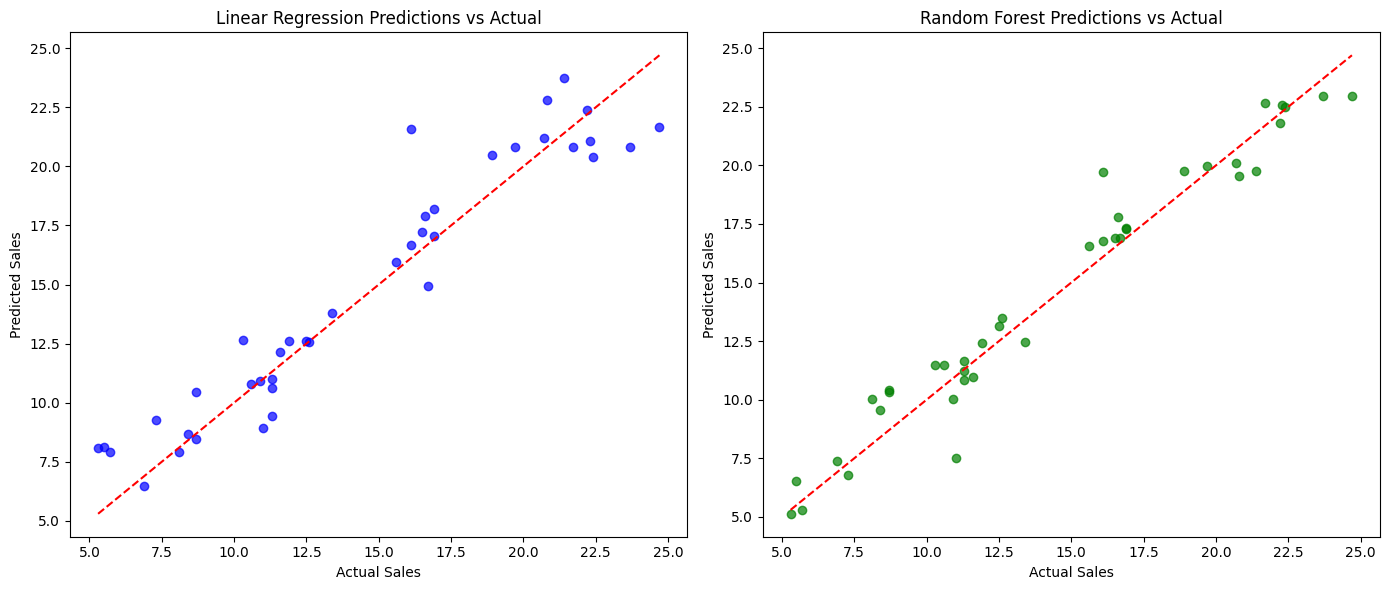

In [ ]:
plt.figure(figsize=(14, 6))

# Linear Regression Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

plt.tight_layout()
plt.show()